# Principal Component Analysis (PCA)

✅ Goal:
Keep the most informative structure of the data with as few dimensions as possible.

PCA finds new axes (called principal components) along which the variance of the data is maximized. These new axes are orthogonal (i.e., at right angles) and ordered by how much of the data's variation they capture.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [14]:
# Load example data
X = load_iris().data  # 150 samples, 4 features

In [15]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Step 1: Standardize the data

Before you dive into PCA, you need to make sure your data is standardized.

Why? PCA is sensitive to the scale of the variables. If one feature has a much larger scale than another (e.g., salary vs. age), it will dominate the principal components.

What to do: Subtract the mean and divide by the standard deviation for each feature. In other words, transform your data into z-scores.

$$x' = \frac{x - \mu}{\sigma}$$

This ensures that each feature contributes equally to the analysis.

In [16]:
# Step 1: Standardize the data
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_standardized = (X - X_mean) / X_std

In [17]:
X_standardized

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

## Step 2: Compute the Principal Components

Once the data is standardized, the core of PCA begins: finding the directions of maximum variance.

1. Compute the covariance matrix of the standardized data.

$$C = \frac{1}{n-1}X^\top X$$

2. Compute the eigenvectors and eigenvalues of the covariance matrix. By solve

$$C\vec{v} = \lambda \vec{v} $$

Each eigenvector corresponds to a principal component, and its eigenvalue tells you how much of the total variance that component explains.

In [18]:
# Step 2a: Compute the covariance matrix
cov_matrix = np.cov(X_standardized.T)

In [19]:
cov_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [20]:

# Step 2b: Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [21]:
eigenvalues

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [22]:
eigenvectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

## Step 3: Project the Data

The final step is to project your original data onto the new principal components.

Why? This transforms your data into a lower-dimensional space where the most important features (variations) are preserved.

Let’s say you choose the top k principal components (e.g., 2 or 3 for visualization), you multiply your standardized data by the corresponding k eigenvectors:

$$Z = X_{\text{standardize}}\cdot W_k$$

- $W_k$ s a matrix of the top $k$ eigenvectors.
- $Z$  is your transformed dataset in reduced dimensions.

In [23]:
# Step 3a: Sort eigenvectors by descending eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [24]:
eigenvectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [26]:
# Step 3b: Choose top k eigenvectors (e.g., k=2 for 2D projection)
k = 2
W = eigenvectors[:, :k]

# Step 3c: Project the standardized data onto principal components
Z = X_standardized @ W

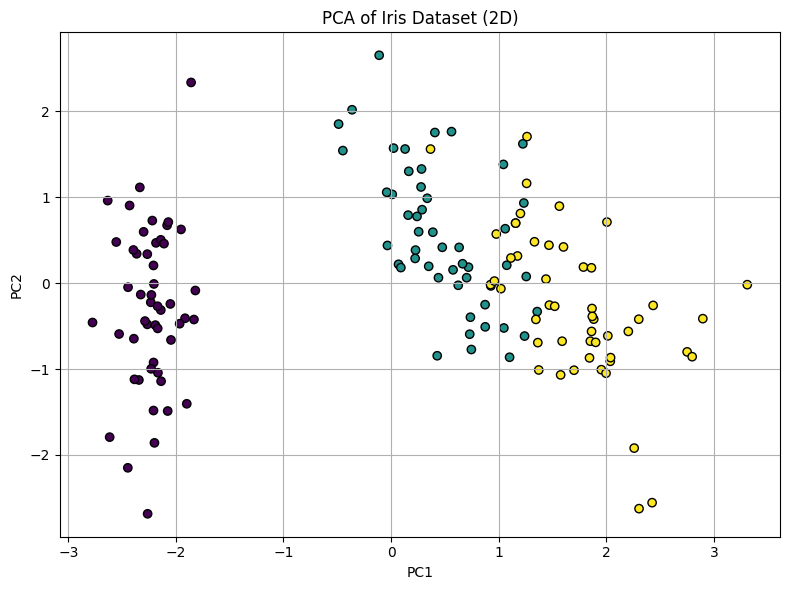

In [27]:
# Plot the 2D projected data
plt.figure(figsize=(8, 6))
plt.scatter(Z[:, 0], Z[:, 1], c=load_iris().target, cmap='viridis', edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Iris Dataset (2D)')
plt.grid(True)
plt.tight_layout()
plt.show()


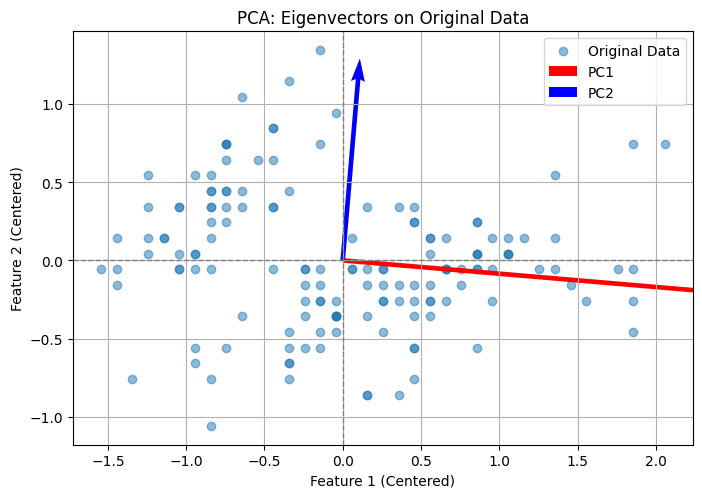

In [12]:
# Load the dataset (only 2 features for visualization)
X = load_iris().data[:, :2]  # take only the first two features for 2D
X_mean = np.mean(X, axis=0)
X_centered = X - X_mean

# Compute the covariance matrix
cov_matrix = np.cov(X_centered.T)

# Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Plot original data
plt.figure(figsize=(8, 6))
plt.scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.5, label="Original Data")

# Plot eigenvectors
for i in range(len(eigenvalues)):
    vec = eigenvectors[:, i]
    scale = np.sqrt(eigenvalues[i]) * 3  # Scale for visualization
    plt.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy',
               scale=1/scale, color=['r', 'b'][i], label=f'PC{i+1}')

# Decorations
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.gca().set_aspect('equal')
plt.xlabel("Feature 1 (Centered)")
plt.ylabel("Feature 2 (Centered)")
plt.title("PCA: Eigenvectors on Original Data")
plt.legend()
plt.grid(True)
plt.show()
